In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
import cellrank as cr
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad('lung_heoa_3khvg_dpt.h5ad')

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [3]:
pk = cr.kernels.PseudotimeKernel(adata, time_key='dpt_pseudotime')

In [4]:
pk

PseudotimeKernel[n=225487]

In [5]:
pk.compute_transition_matrix()

  0%|          | 0/225487 [00:00<?, ?cell/s]

100%|██████████| 225487/225487 [00:19<00:00, 11390.52cell/s]


PseudotimeKernel[n=225487, dnorm=False, scheme='hard', frac_to_keep=0.3]

In [6]:
cell_type_colors = {
    'basal cells': '#16f648',
    'club cells': '#795548',
    'ciliated cells': '#1c15bc',
    'alveolar type 1 (AT1) cells': '#85C1E9',
    'alveolar type 2 (AT2) cells': '#f1f847',
    'neuroendocrine cells': '#8F4646',
    'airway secretory cells': '#a8bade',
    'goblet cells': '#8e3101',
    'stem cells': '#225805'
}

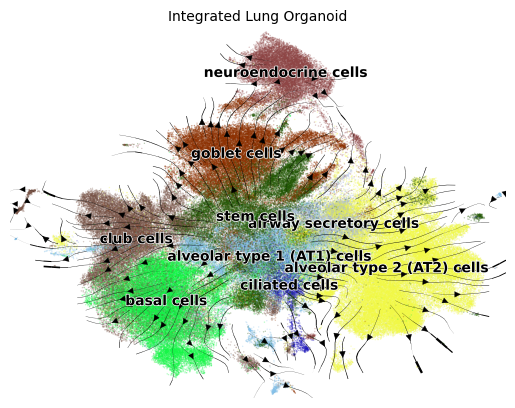

In [7]:
pk.plot_projection(basis='X_umap', color='level_2', title='Integrated Lung Organoid', palette=cell_type_colors)

In [10]:
#Leiden cluster by most cell type per cluster

In [15]:
#Estimating cell macro states
from cellrank.estimators import GPCCA

g = GPCCA(pk)
print(g)

GPCCA[kernel=PseudotimeKernel[n=225487], initial_states=None, terminal_states=None]


In [16]:
import petsc4py
import slepc4py

In [17]:
adata.obs.level_2.unique().tolist()

['basal cells',
 'club cells',
 'ciliated cells',
 'alveolar type 1 (AT1) cells',
 'alveolar type 2 (AT2) cells',
 'neuroendocrine cells',
 'airway secretory cells',
 'goblet cells',
 'stem cells']

In [18]:
g.fit(n_states=30, cluster_key='level_2', method='krylov')


GPCCA[kernel=PseudotimeKernel[n=225487], initial_states=None, terminal_states=None]

In [21]:
g.write('g_model_states30.h5')

In [50]:
g.write('g_model_states30.h5', write_adata=True)

In [3]:
g = cr.estimators.GPCCA.read('g_model_states30.h5')

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


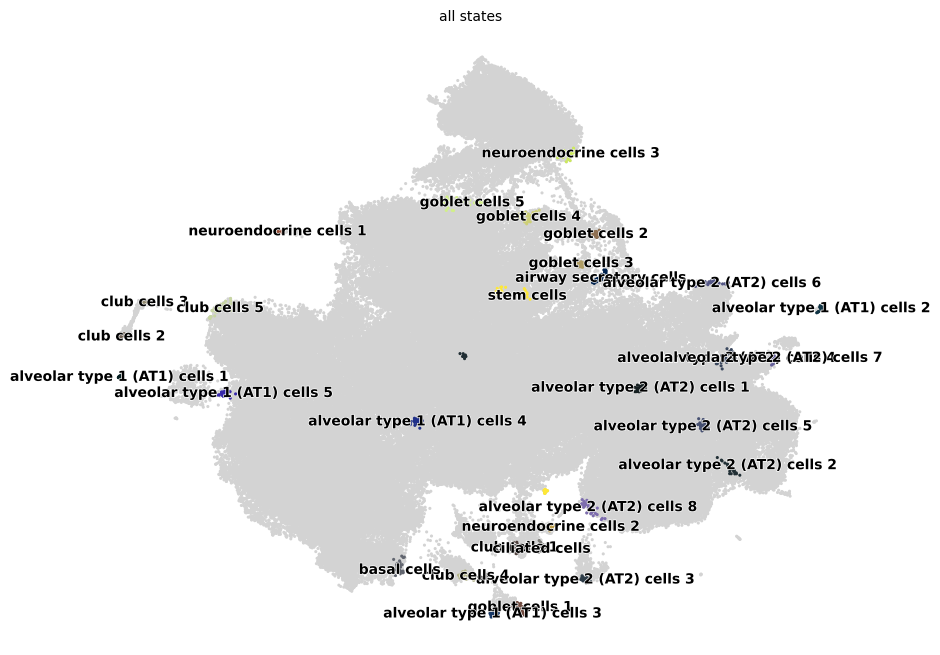

In [6]:
plt.rcParams['figure.figsize'] = (10, 8)
g.plot_macrostates(which="all", cmap='viridis', size=20)

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


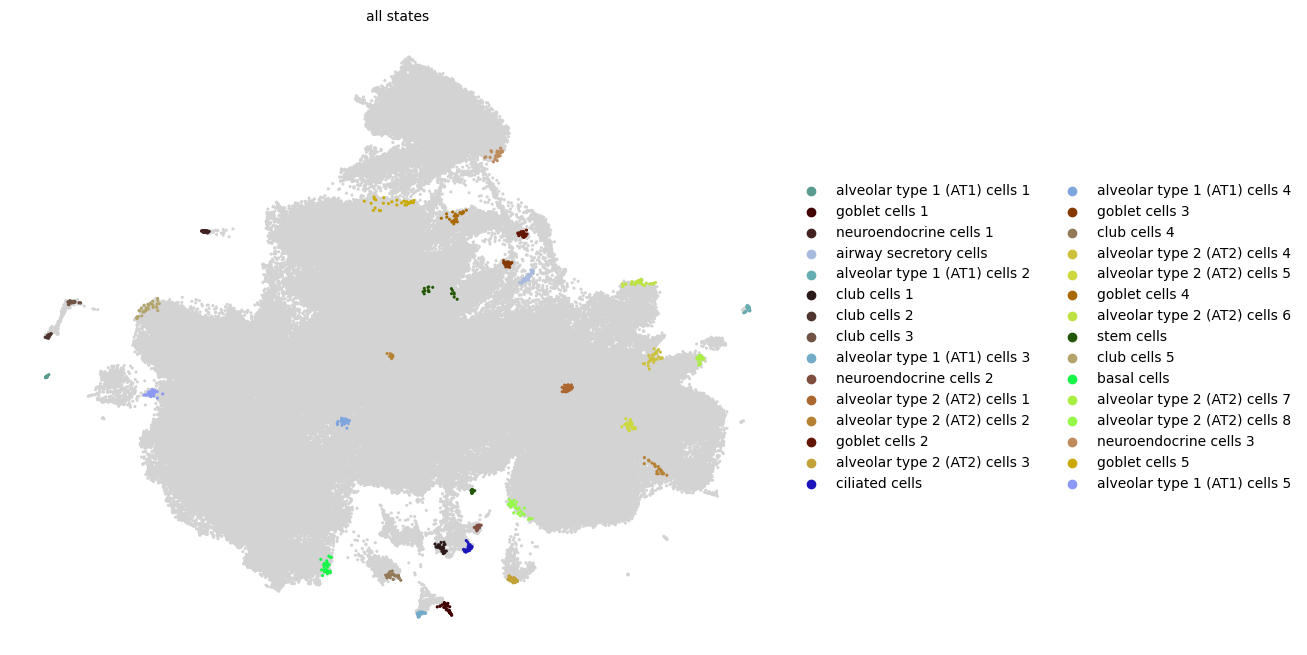

In [16]:
plt.rcParams['figure.figsize'] = (10, 8)
g.plot_macrostates(which="all", cmap='viridis', size=20, legend_loc='right')

In [ ]:
#AT2 cells 8, AT2 cells 7, basal cells, club cells 5, NE cells 3, stem cells, goblet cells 5, ciliated cells, AT2 cells 6, AT1 cells 4, AT1 cell 3

In [7]:
g.macrostates.unique()

[NaN, 'ciliated cells', 'club cells_5', 'club cells_1', 'goblet cells_1', ..., 'airway secretory cells', 'neuroendocrine cells_1', 'neuroendocrine cells_2', 'alveolar type 1 (AT1) cells_2', 'alveolar type 1 (AT1) cells_1']
Length: 31
Categories (30, object): ['alveolar type 1 (AT1) cells_1', 'goblet cells_1', 'neuroendocrine cells_1', 'airway secretory cells', ..., 'alveolar type 2 (AT2) cells_8', 'neuroendocrine cells_3', 'goblet cells_5', 'alveolar type 1 (AT1) cells_5']

## Selected Terminal states: 
AT1 cell 3
AT1 cells 4*
AT2 cells 6
AT2 cells 7
AT2 cells 8*
basal cells
ciliated cells
club cells 5
Goblet cells 2
Goblet cells 5*
NE cells 3
Stem cells


In [4]:
selected_cells = ['alveolar type 1 (AT1) cells_4', 'alveolar type 2 (AT2) cells_8', 'basal cells', 'ciliated cells', 'club cells_5',
'goblet cells_5','neuroendocrine cells_3', 'stem cells']

In [5]:
g.set_terminal_states(states=selected_cells)


GPCCA[kernel=PseudotimeKernel[n=225487], initial_states=None, terminal_states=['alveolar type 1 (AT1) cells_4', 'alveolar type 2 (AT2) cells_8', 'basal cells', 'ciliated cells', 'club cells_5', 'goblet cells_5', 'neuroendocrine cells_3', 'stem cells']]

/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


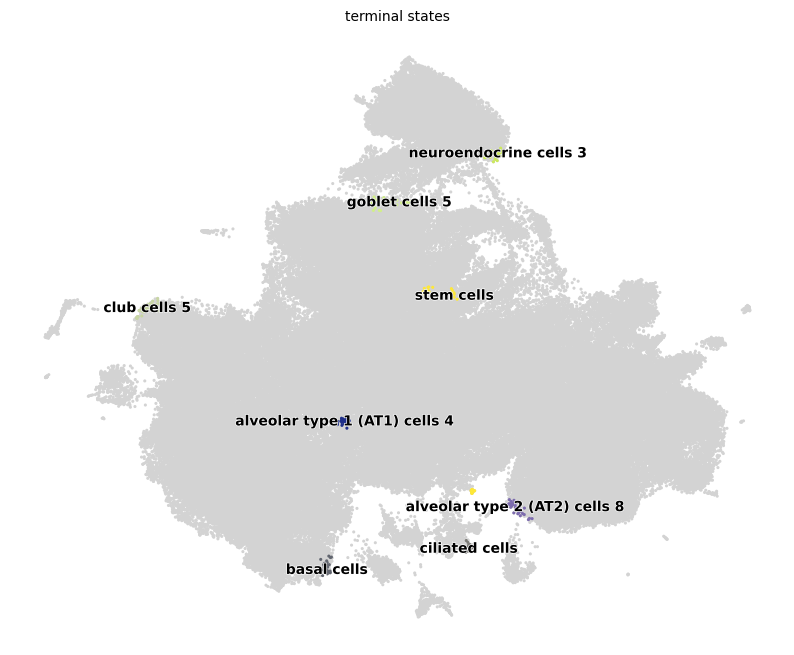

In [10]:
g.plot_macrostates(which="terminal", size=20)

In [6]:
cr.settings.verbosity = 2

In [7]:
# Value Error in computing fate probabilities. Change the hard coded rtol value to 1 in the function for it to work.
g.compute_fate_probabilities()

Computing fate probabilities


100%|██████████| 8/8 [00:33<00:00,  4.14s/]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:33)


In [8]:
g.adata.obsm['lineages_fwd']

alveolar type 1 (AT1) cells_4,alveolar type 2 (AT2) cells_8,basal cells,ciliated cells,club cells_5,goblet cells_5,neuroendocrine cells_3,stem cells
0.002701,0.052966,0.589483,0.009688,0.139514,0.037686,0.165107,0.002753
0.002459,0.051835,0.530195,0.009967,0.191077,0.036787,0.174878,0.002709
0.002460,0.052713,0.523513,0.009988,0.193198,0.037418,0.177841,0.002776
0.002810,0.054656,0.587135,0.009858,0.133273,0.039690,0.169556,0.002914
0.000307,0.009670,0.008604,0.000545,0.003219,0.008934,0.968089,0.000613
0.002641,0.054132,0.562512,0.010055,0.151759,0.038809,0.177128,0.002864
0.002450,0.051698,0.528277,0.010009,0.193746,0.036780,0.174244,0.002704
0.002855,0.051810,0.627023,0.008986,0.116706,0.036783,0.153066,0.002663
0.002612,0.053613,0.562019,0.010082,0.153553,0.038410,0.176782,0.002829
0.002824,0.052678,0.619002,0.009209,0.119405,0.037454,0.156599,0.002721


/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(
/Users/shrey.parikh/anaconda3/lib/python3.10/site-packages/scvelo/plotting/scatter.py:614: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  smp = ax.scatter(


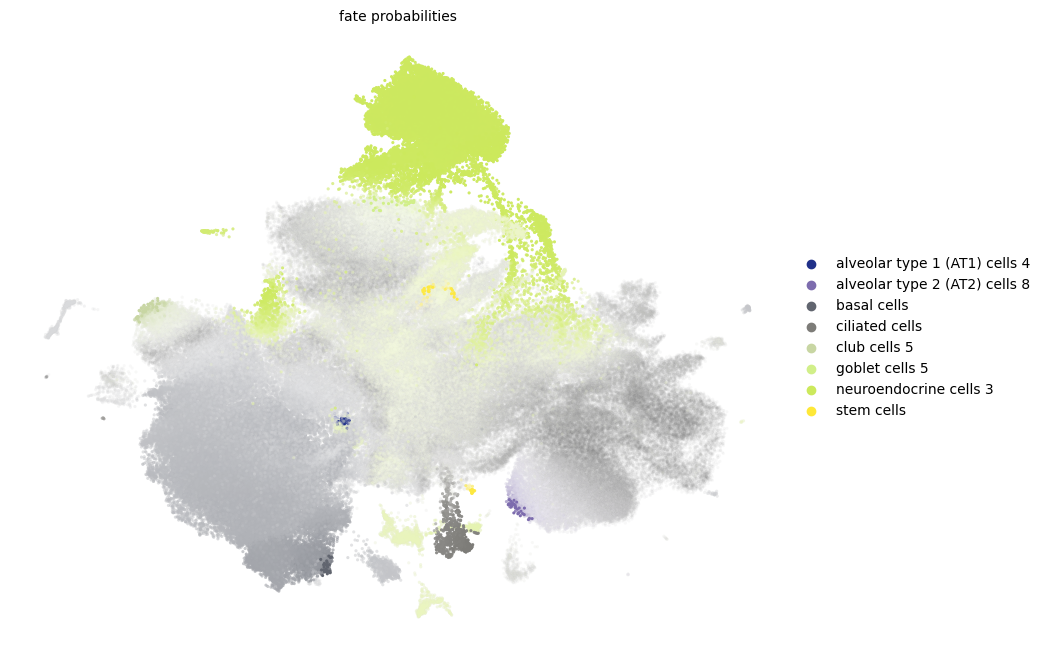

In [14]:
g.plot_fate_probabilities(legend_loc="right",size=20)

Solving TSP for `8` states


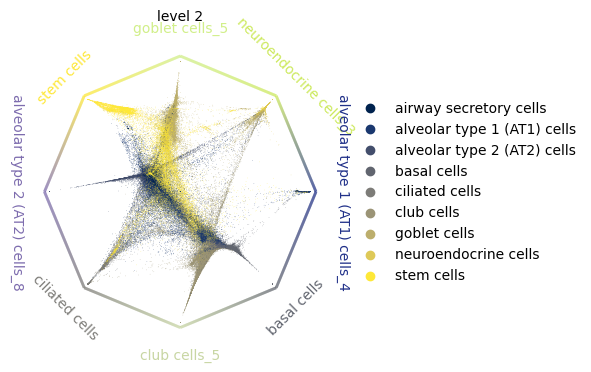

In [13]:
plt.rcParams['figure.figsize'] = (10,8)
cr.pl.circular_projection(g.adata, keys="level_2", legend_loc="right")


In [26]:
#Drivers for all cells at the same time
#Does not make much sense and it is better to do for each cell type individually
mono_drivers = g.compute_lineage_drivers(lineages=selected_cells)
mono_drivers.head(10)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:04)


,alveolar type 1 (AT1) cells_4_corr,alveolar type 1 (AT1) cells_4_pval,alveolar type 1 (AT1) cells_4_qval,alveolar type 1 (AT1) cells_4_ci_low,alveolar type 1 (AT1) cells_4_ci_high,alveolar type 2 (AT2) cells_8_corr,alveolar type 2 (AT2) cells_8_pval,alveolar type 2 (AT2) cells_8_qval,alveolar type 2 (AT2) cells_8_ci_low,alveolar type 2 (AT2) cells_8_ci_high,...,neuroendocrine cells_3_corr,neuroendocrine cells_3_pval,neuroendocrine cells_3_qval,neuroendocrine cells_3_ci_low,neuroendocrine cells_3_ci_high,stem cells_corr,stem cells_pval,stem cells_qval,stem cells_ci_low,stem cells_ci_high
PRRX1,0.362041,0.0,0.0,0.358449,0.365622,-0.031069,2.728405e-49,4.524718e-49,-0.035192,-0.026945,...,0.019783,5.709776e-21,1.005242e-20,0.015657,0.023909,-0.009396,8.123574e-06,1.248500e-05,-0.013523,-0.005269
COL3A1,0.360455,0.0,0.0,0.356859,0.364041,-0.047157,3.185540e-111,6.744263e-111,-0.051275,-0.043038,...,0.038516,8.529123e-75,2.080274e-74,0.034394,0.042637,-0.013222,3.415751e-10,5.950787e-10,-0.017348,-0.009095
PTCH1,0.339786,0.0,0.0,0.336130,0.343432,-0.051631,5.664108e-133,1.278580e-132,-0.055747,-0.047514,...,0.046664,6.062800e-109,1.711044e-108,0.042544,0.050781,0.000224,9.153195e-01,9.252739e-01,-0.003904,0.004351
HOXB2,0.337152,0.0,0.0,0.333489,0.340806,-0.023755,1.608381e-29,2.433254e-29,-0.027880,-0.019629,...,-0.001866,3.756915e-01,4.018091e-01,-0.005993,0.002262,0.008168,1.049528e-04,1.545697e-04,0.004041,0.012295
CRB2,0.324960,0.0,0.0,0.321264,0.328647,-0.018935,2.424221e-19,3.441866e-19,-0.023060,-0.014808,...,0.003739,7.585773e-02,8.705937e-02,-0.000389,0.007866,-0.001567,4.568928e-01,5.033706e-01,-0.005694,0.002561
CDH11,0.322884,0.0,0.0,0.319182,0.326577,0.081947,0.000000e+00,0.000000e+00,0.077846,0.086046,...,0.024627,1.324090e-31,2.584430e-31,0.020502,0.028752,-0.015538,1.596165e-13,3.032612e-13,-0.019664,-0.011411
DOK4,0.320405,0.0,0.0,0.316696,0.324104,-0.024520,2.415240e-31,3.696796e-31,-0.028644,-0.020394,...,-0.001648,4.339923e-01,4.608768e-01,-0.005775,0.002480,0.061327,6.684317e-187,3.213614e-186,0.057214,0.065438
MSX1,0.318038,0.0,0.0,0.314324,0.321744,-0.027729,1.296111e-39,2.058409e-39,-0.031853,-0.023604,...,0.003645,8.347852e-02,9.533139e-02,-0.000482,0.007772,0.021370,3.343556e-24,7.513609e-24,0.017244,0.025495
LUM,0.309447,0.0,0.0,0.305710,0.313175,-0.021745,5.304774e-25,7.816464e-25,-0.025870,-0.017619,...,0.025383,1.806942e-33,3.575743e-33,0.021258,0.029508,0.038657,2.483910e-75,7.969765e-75,0.034535,0.042778
COL6A2,0.299102,0.0,0.0,0.295340,0.302856,-0.048696,1.762350e-118,3.820122e-118,-0.052813,-0.044578,...,0.041415,3.389075e-86,8.779987e-86,0.037294,0.045534,-0.000005,9.981769e-01,9.981769e-01,-0.004132,0.004123


In [22]:
model = cr.models.GAM(g.adata)

Computing trends using `1` core(s)


 25%|██▌       | 1/4 [00:51<02:35, 51.87s/gene]

did not converge


 50%|█████     | 2/4 [01:00<00:53, 26.61s/gene]

did not converge


100%|██████████| 4/4 [03:50<00:00, 57.59s/gene]

    Finish (0:03:50)


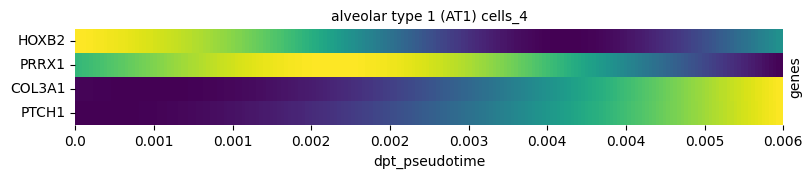

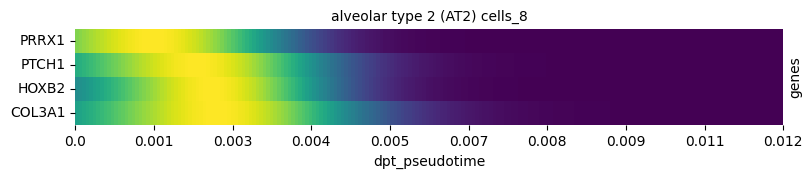

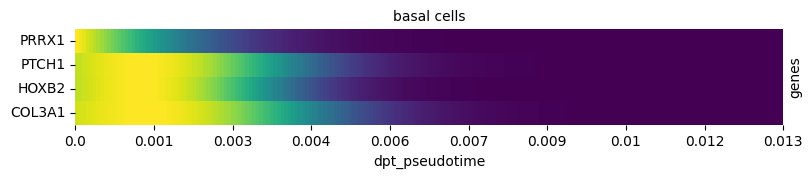

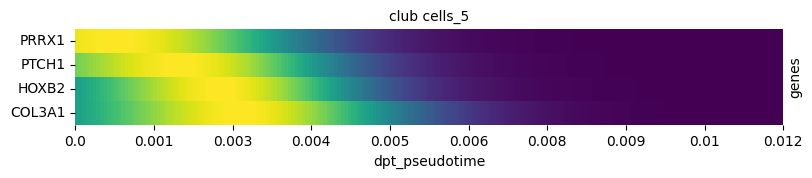

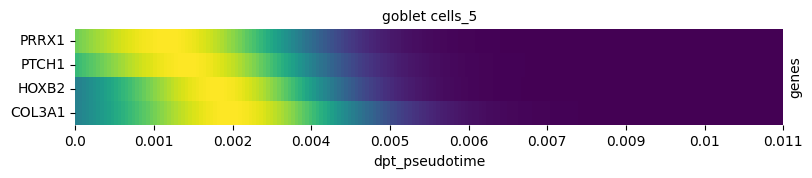

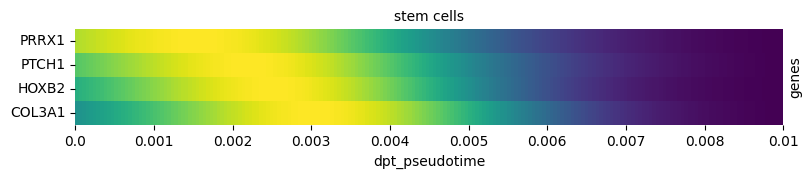

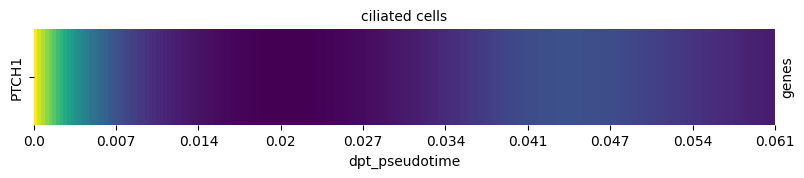

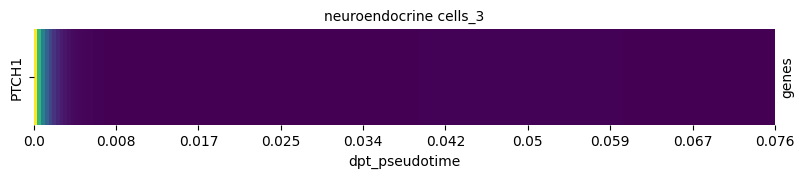

In [24]:
for cell in selected_cells:
    mono_drivers = g.compute_lineage_drivers(lineages=cell)
    cr.pl.heatmap(
        g.adata,
        model=model,
        genes=mono_drivers.index[:5].tolist(),
        lineages=cell,
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
)

In [34]:
mono_drivers_dict = {}
for cell in selected_cells:
    # Compute mono_drivers for the current cell type
    mono_drivers = g.compute_lineage_drivers(lineages=cell)
    mono_drivers_dict[f'mono_drivers_{cell}'] = mono_drivers


Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:02)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:02)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:02)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)


In [ ]:
cr.pl.heatmap(
        g.adata,
        model=model,
        genes=mono_drivers_cc.index[:5].tolist(),
        lineages=cell,
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
)

In [44]:
selected_cells_names = ['AT1', 'AT2', 'BC', 'CC', 'CLC', 'GC', 'NEC', 'SC']

In [50]:
df_list = []
for cell,name in zip(selected_cells,selected_cells_names):
    globals()['mono_drivers_' + str(name)] = g.compute_lineage_drivers(lineages=cell)
    df_list.append(globals()['mono_drivers_' + str(name)])

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:02)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:02)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)
Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:01)


Computing trends using `1` core(s)


100%|██████████| 5/5 [00:00<00:00,  5.84gene/s]

    Finish (0:00:00)
Computing trends using `1` core(s)



100%|██████████| 5/5 [02:20<00:00, 28.16s/gene]

did not converge
    Finish (0:02:20)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:14<00:00,  2.93s/gene]

    Finish (0:00:14)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:03<00:00,  1.54gene/s]

    Finish (0:00:03)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:17<00:00,  3.45s/gene]

    Finish (0:00:17)
Computing trends using `1` core(s)



 20%|██        | 1/5 [02:52<11:29, 172.27s/gene]

did not converge


 60%|██████    | 3/5 [04:30<02:46, 83.29s/gene] 

did not converge


100%|██████████| 5/5 [06:07<00:00, 73.51s/gene]

did not converge
    Finish (0:06:07)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:06<00:00,  1.29s/gene]

    Finish (0:00:06)
Computing trends using `1` core(s)



100%|██████████| 5/5 [00:01<00:00,  3.34gene/s]

    Finish (0:00:01)


RuntimeError: Fatal model failure `<FailedModel[origin=GAM[gene='CALML4', lineage='stem cells', model=GammaGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, max_iter=2000, scale=None, terms=s(0) + intercept, tol=0.0001, verbose=False)]]>`.

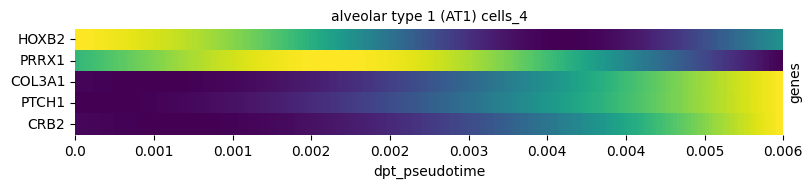

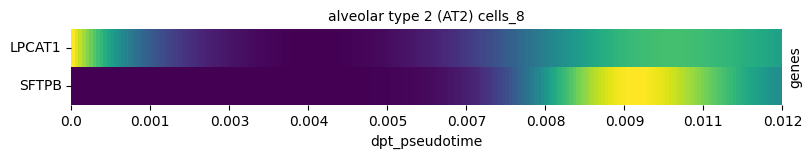

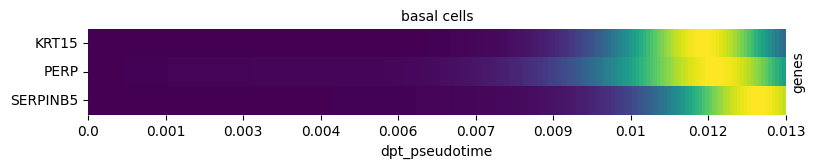

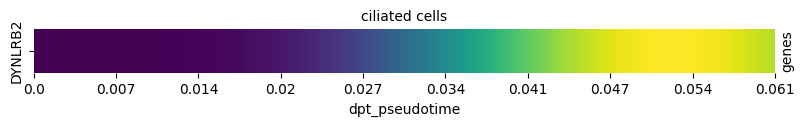

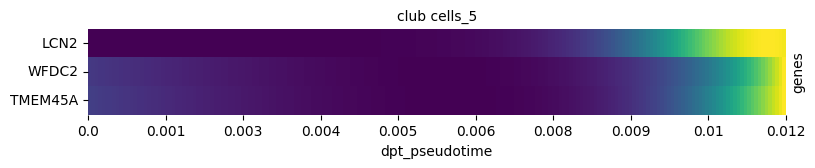

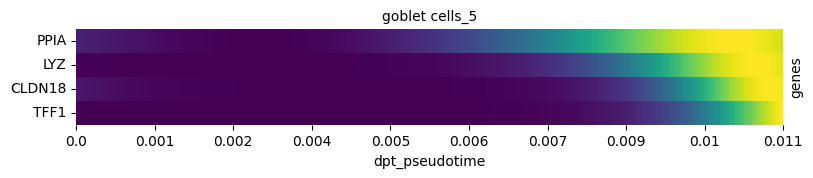

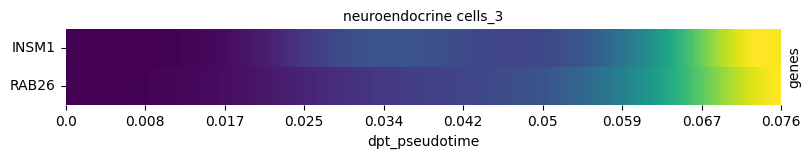

In [56]:
for df,cell in zip(df_list, selected_cells):
    cr.pl.heatmap(
        g.adata,
        model=model,
        genes=df.index[:5].tolist(),
        lineages=cell,
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
)

Computing trends using `1` core(s)


did not converge


100%|██████████| 20/20 [00:46<00:00,  2.32s/gene]

    Finish (0:00:46)


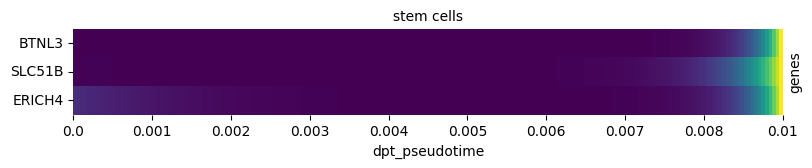

In [76]:
#Stem cells have less driver genes and therefore works only with firs 20 genes instead of the first 5
cr.pl.heatmap(
        g.adata,
        model=model,
        genes=df_list[7].index[:20].tolist(),
        lineages='stem cells',
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
)

In [73]:
df_list[7]

,stem cells_corr,stem cells_pval,stem cells_qval,stem cells_ci_low,stem cells_ci_high
CALML4,0.616163,0.000000e+00,0.000000e+00,0.613596,0.618717
MTTP,0.611641,0.000000e+00,0.000000e+00,0.609051,0.614218
CDHR5,0.607924,0.000000e+00,0.000000e+00,0.605316,0.610520
LGALS2,0.577306,0.000000e+00,0.000000e+00,0.574547,0.580051
TSPAN8,0.573637,0.000000e+00,0.000000e+00,0.570861,0.576399
...,...,...,...,...,...
KRT15,-0.070795,1.407333e-248,7.676362e-248,-0.074901,-0.066687
ANXA1,-0.073106,5.527891e-265,3.117232e-264,-0.077210,-0.068999
INSM1,-0.073552,3.260885e-268,1.849273e-267,-0.077656,-0.069445
SCG3,-0.073900,9.571262e-271,5.458895e-270,-0.078004,-0.069794


Computing trends using `1` core(s)


100%|██████████| 20/20 [00:04<00:00,  4.56gene/s]

    Finish (0:00:04)


Computing trends using `1` core(s)


did not converge


did not converge


100%|██████████| 20/20 [07:03<00:00, 21.20s/gene]

did not converge
    Finish (0:07:03)
Computing trends using `1` core(s)



100%|██████████| 20/20 [01:27<00:00,  4.38s/gene]

    Finish (0:01:27)


Computing trends using `1` core(s)


100%|██████████| 20/20 [01:03<00:00,  3.17s/gene]

    Finish (0:01:03)
Computing trends using `1` core(s)



100%|██████████| 20/20 [01:14<00:00,  3.71s/gene]

    Finish (0:01:14)
Computing trends using `1` core(s)


did not converge


did not converge


did not converge


did not converge


did not converge


did not converge


100%|██████████| 20/20 [10:42<00:00, 32.15s/gene]

    Finish (0:10:42)
Computing trends using `1` core(s)


did not converge


did not converge


did not converge


100%|██████████| 20/20 [09:10<00:00, 27.51s/gene]

    Finish (0:09:10)
Computing trends using `1` core(s)


did not converge


100%|██████████| 20/20 [00:45<00:00,  2.29s/gene]

    Finish (0:00:45)


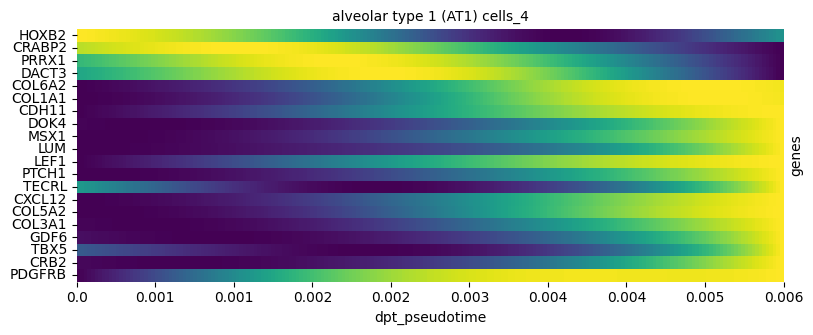

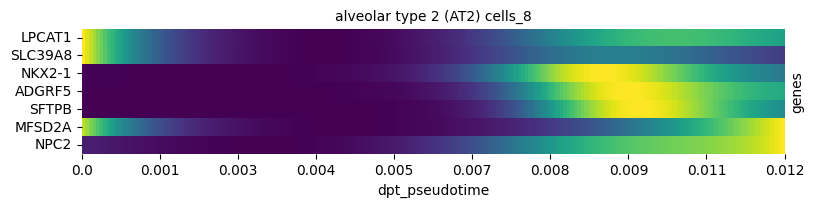

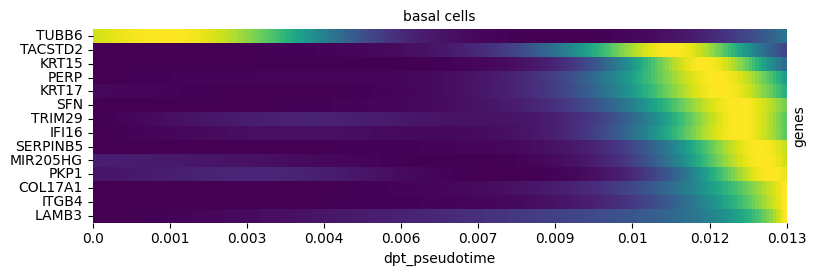

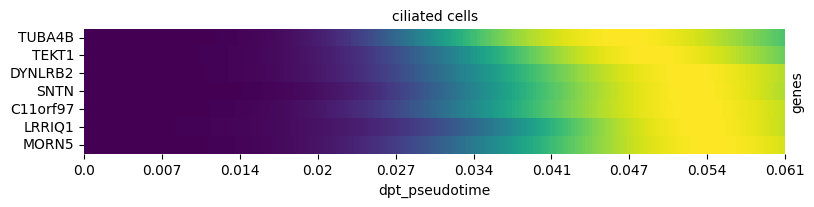

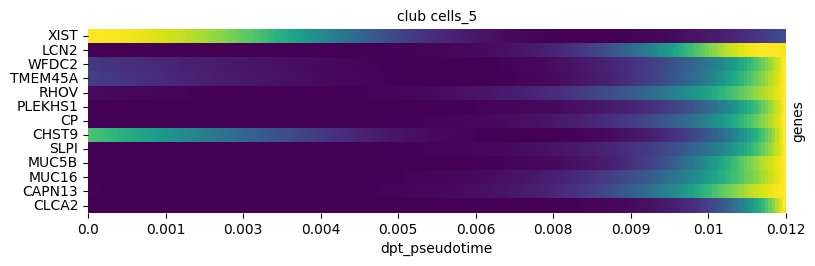

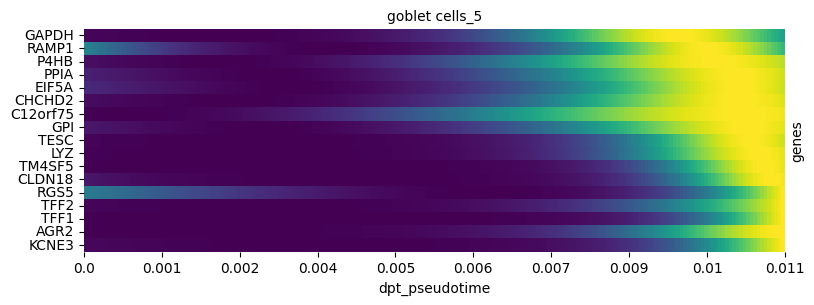

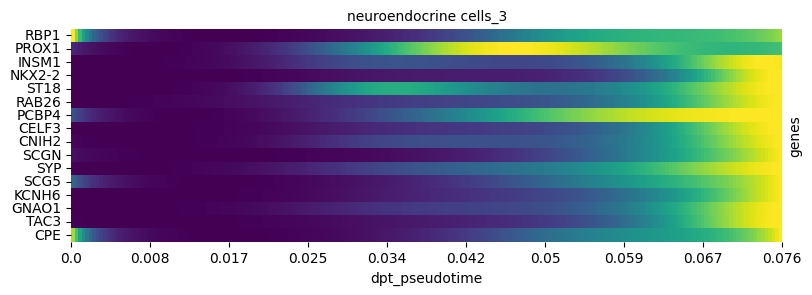

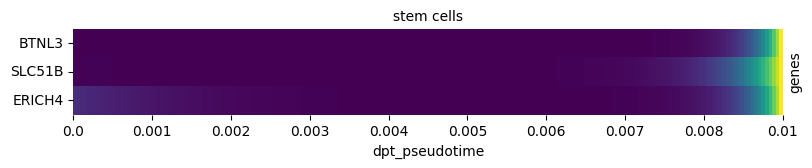

In [90]:
#Create heatmaps for the first 20 genes for all cell types
for (i,cell) in zip(range(0,9),selected_cells):
    cr.pl.heatmap(
        g.adata,
        model=model,
        genes=df_list[i].index[:20].tolist(),
        lineages=cell,
        time_key="dpt_pseudotime",
        cbar=False,
        show_all_genes=True,
)

In [9]:
g.write('g_model_states30_computed_fate.h5', write_adata=True)

Writing `GPCCA[kernel=PseudotimeKernel[n=225487], initial_states=None, terminal_states=['alveolar type 1 (AT1) cells_4', 'alveolar type 2 (AT2) cells_8', 'basal cells', 'ciliated cells', 'club cells_5', 'goblet cells_5', 'neuroendocrine cells_3', 'stem cells']]` to `g_model_states30_computed_fate.h5`
